In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import numpy as np

from iterlike_dataset import IterlikeDataset
from iterlike_dataset.plot import contourf


In [70]:
dataset = IterlikeDataset(dataset_id = "matteobonotto/iterlike_equil_sample")
print(dataset)

Loading eqilibrium data
Load geometry data
done
ITER-like equilibrium dataset with 8192 samples and keys:
 mag_measures
 flux
 rhs
 coils_current
 separatrix
 id_diverted
 p_profile



In [71]:
ds = dataset.equil_data.with_format('numpy')

In [72]:
ds[0]['flux'].shape

(64, 64)

In [73]:
sample = dataset[0]
first_wall = dataset.first_wall
grid = dataset.grid

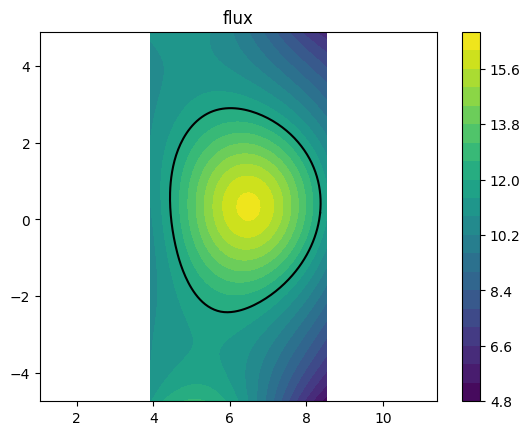

In [74]:
contourf(
    z = sample['flux'],
    RR = grid.r,
    ZZ = grid.z,
    separatrix=sample['separatrix'],
    title='flux'    
)

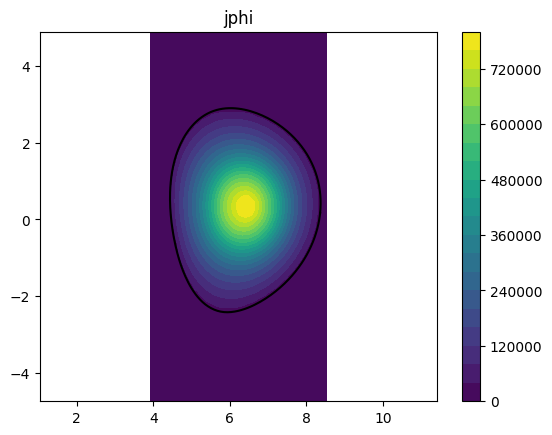

In [75]:
from iterlike_dataset.constants import mu0

jphi = - sample['rhs']/(mu0 * grid.r)

contourf(
    z = jphi,
    RR = grid.r,
    ZZ = grid.z,
    separatrix=sample['separatrix'],
    title='jphi'    
)

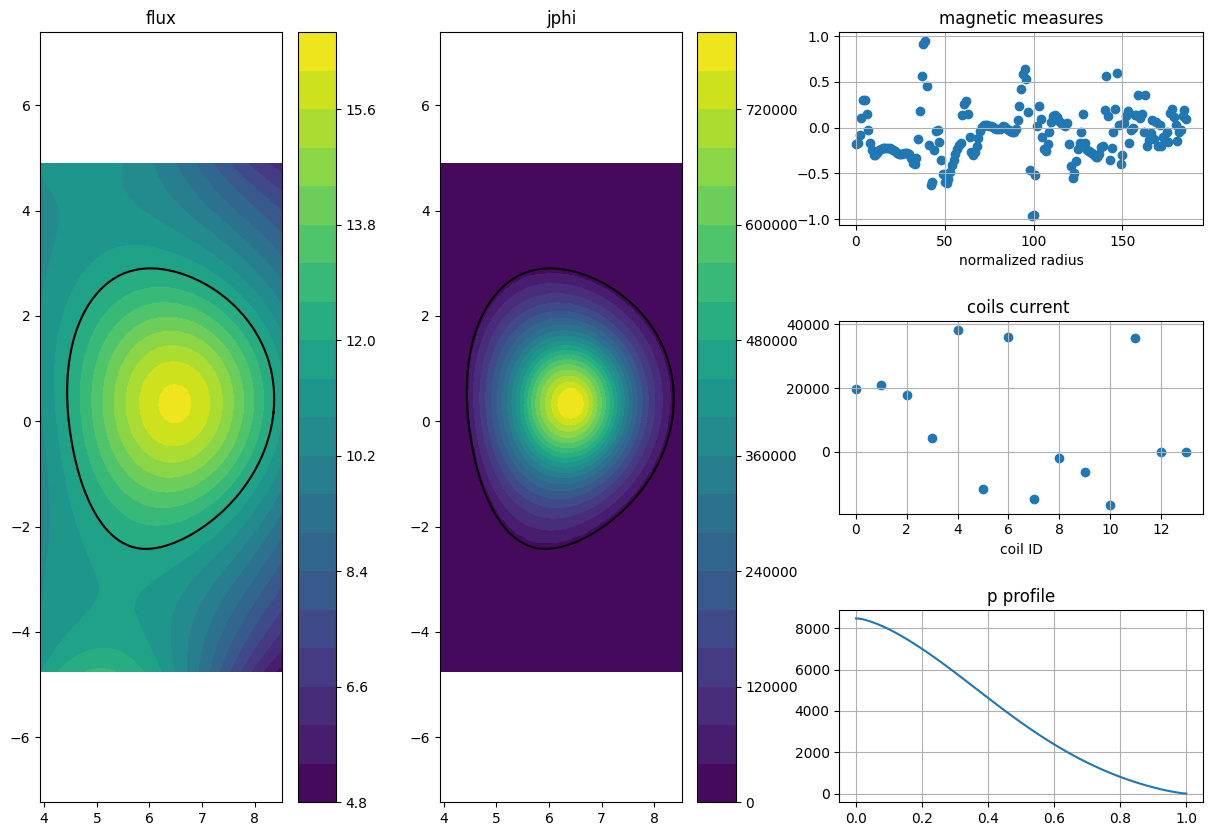

In [97]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


z1 = sample['flux']
z2 = - sample['rhs']/(mu0 * grid.r)
coil_curr = sample['coils_current']
mag_measures = sample['mag_measures']
p_profile = sample['p_profile']
RR = grid.r
ZZ = grid.z
separatrix=sample['separatrix']
title='flux'    

# Dummy data
# RR, ZZ = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
# z1 = np.sin(np.pi * RR) * np.cos(np.pi * ZZ)
# z2 = np.cos(np.pi * RR) * np.sin(np.pi * ZZ)
# line_x = np.linspace(0, 10, 100)
# # line_ys = [np.sin(line_x), np.cos(line_x), np.tan(line_x)]
# line_ys = [
#     mag_measures.reshape(-1,1), coil_curr.reshape(-1,1), p_profile.reshape(-1,1)]
# tiles = ['magnetic measures', 'coils current', 'p profile']
# line_xs = [
#     np.arange(mag_measures.shape[0]),
#     np.arange(coil_curr.shape[0]),
#     np.linspace(0,1,p_profile.shape[0]),
# ]
# Updated contourf function that accepts ax
def contourf(z, RR, ZZ, title="", separatrix=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    c = ax.contourf(RR, ZZ, z, 20)
    ax.axis("equal")
    plt.colorbar(c, ax=ax)
    if separatrix is not None:
        ax.plot(separatrix[:, 0], separatrix[:, 1], "k")
    ax.set_title(title)

# Create figure and master GridSpec
fig = plt.figure(figsize=(15, 10))
outer = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 1, 1.2], wspace=0.3)

# Contour plots (left and middle) take full height
ax1 = fig.add_subplot(outer[0, 0])
contourf(z1, RR, ZZ, separatrix=separatrix, title="flux", ax=ax1)

ax2 = fig.add_subplot(outer[0, 1])
contourf(z2, RR, ZZ, separatrix=separatrix, title="jphi", ax=ax2)

# Right column: nested GridSpec for vertical stacking
inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[0, 2], hspace=0.5)

ax3 = fig.add_subplot(inner[0])
ax4 = fig.add_subplot(inner[1])
ax5 = fig.add_subplot(inner[2])

# plot measures
ax3.scatter(np.arange(mag_measures.shape[0]), mag_measures.reshape(-1,1))
ax3.set_title('magnetic measures')
ax3.set_xlabel("sensor ID")
ax3.grid(True)

# plot currents
ax4.scatter(np.arange(coil_curr.shape[0]), coil_curr.reshape(-1,1))
ax4.set_title('coils current ')
ax4.set_xlabel("coil ID")
ax4.grid(True)

# plot p profile
ax5.plot(np.linspace(0,1,p_profile.shape[0]), p_profile.reshape(-1,1))
ax5.set_title('p profile')
ax3.set_xlabel("normalized radius")
ax5.grid(True)


# for ax, x, y, label in zip([ax3, ax4, ax5], line_xs , line_ys, tiles):
#     ax.plot(x, y)
#     ax.set_title(label)
#     ax.grid(True)

# plt.tight_layout()
plt.show()
